In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/daily-website-visitors.csv")

In [4]:
df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


In [5]:
df.head


<bound method NDFrame.head of        Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0        1     Sunday            1  9/14/2014      2,146         1,582   
1        2     Monday            2  9/15/2014      3,621         2,528   
2        3    Tuesday            3  9/16/2014      3,698         2,630   
3        4  Wednesday            4  9/17/2014      3,667         2,614   
4        5   Thursday            5  9/18/2014      3,316         2,366   
...    ...        ...          ...        ...        ...           ...   
2162  2163   Saturday            7  8/15/2020      2,221         1,696   
2163  2164     Sunday            1  8/16/2020      2,724         2,037   
2164  2165     Monday            2  8/17/2020      3,456         2,638   
2165  2166    Tuesday            3  8/18/2020      3,581         2,683   
2166  2167  Wednesday            4  8/19/2020      2,064         1,564   

     First.Time.Visits Returning.Visits  
0                1,430              152

In [6]:
df.tail

<bound method NDFrame.tail of        Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0        1     Sunday            1  9/14/2014      2,146         1,582   
1        2     Monday            2  9/15/2014      3,621         2,528   
2        3    Tuesday            3  9/16/2014      3,698         2,630   
3        4  Wednesday            4  9/17/2014      3,667         2,614   
4        5   Thursday            5  9/18/2014      3,316         2,366   
...    ...        ...          ...        ...        ...           ...   
2162  2163   Saturday            7  8/15/2020      2,221         1,696   
2163  2164     Sunday            1  8/16/2020      2,724         2,037   
2164  2165     Monday            2  8/17/2020      3,456         2,638   
2165  2166    Tuesday            3  8/18/2020      3,581         2,683   
2166  2167  Wednesday            4  8/19/2020      2,064         1,564   

     First.Time.Visits Returning.Visits  
0                1,430              152

In [7]:
df.shape

(2167, 8)

In [8]:
df.describe

<bound method NDFrame.describe of        Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0        1     Sunday            1  9/14/2014      2,146         1,582   
1        2     Monday            2  9/15/2014      3,621         2,528   
2        3    Tuesday            3  9/16/2014      3,698         2,630   
3        4  Wednesday            4  9/17/2014      3,667         2,614   
4        5   Thursday            5  9/18/2014      3,316         2,366   
...    ...        ...          ...        ...        ...           ...   
2162  2163   Saturday            7  8/15/2020      2,221         1,696   
2163  2164     Sunday            1  8/16/2020      2,724         2,037   
2164  2165     Monday            2  8/17/2020      3,456         2,638   
2165  2166    Tuesday            3  8/18/2020      3,581         2,683   
2166  2167  Wednesday            4  8/19/2020      2,064         1,564   

     First.Time.Visits Returning.Visits  
0                1,430             

In [9]:
df.columns

Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

In [10]:
df.isnull

<bound method DataFrame.isnull of        Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0        1     Sunday            1  9/14/2014      2,146         1,582   
1        2     Monday            2  9/15/2014      3,621         2,528   
2        3    Tuesday            3  9/16/2014      3,698         2,630   
3        4  Wednesday            4  9/17/2014      3,667         2,614   
4        5   Thursday            5  9/18/2014      3,316         2,366   
...    ...        ...          ...        ...        ...           ...   
2162  2163   Saturday            7  8/15/2020      2,221         1,696   
2163  2164     Sunday            1  8/16/2020      2,724         2,037   
2164  2165     Monday            2  8/17/2020      3,456         2,638   
2165  2166    Tuesday            3  8/18/2020      3,581         2,683   
2166  2167  Wednesday            4  8/19/2020      2,064         1,564   

     First.Time.Visits Returning.Visits  
0                1,430             

In [11]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Row    Day  Day.Of.Week   Date  Page.Loads  Unique.Visits  \
0     False  False        False  False       False          False   
1     False  False        False  False       False          False   
2     False  False        False  False       False          False   
3     False  False        False  False       False          False   
4     False  False        False  False       False          False   
...     ...    ...          ...    ...         ...            ...   
2162  False  False        False  False       False          False   
2163  False  False        False  False       False          False   
2164  False  False        False  False       False          False   
2165  False  False        False  False       False          False   
2166  False  False        False  False       False          False   

      First.Time.Visits  Returning.Visits  
0                 False             False  
1                 Fal

In [12]:
df.dropna()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


<ipython-input-13-2ed981cfb257>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr(method='pearson')


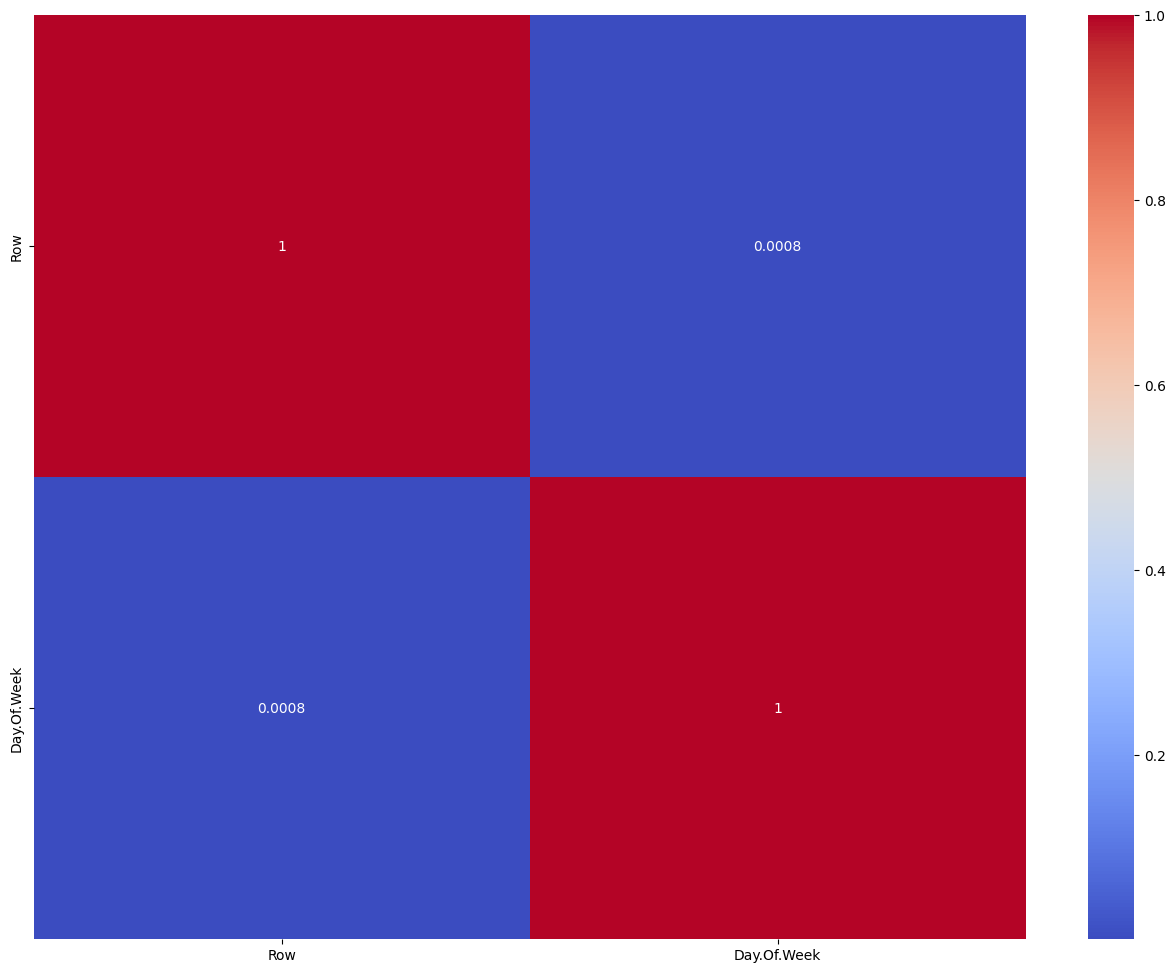

In [13]:
correlations = df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [14]:
target_variable = df['Page.Loads']  # Replace with your target variable
feature_columns = ['Unique.Visits', 'First.Time.Visits', 'ActualWindProduction', 'Returning.Visits']


In [15]:
df['Days'] = df['Date'].shift(1)  # Lag feature for the target variable
df['Day.of.week'] = df['Date'].shift(7)  # 7-day lag feature


In [16]:
print(df.dtypes)

Row                   int64
Day                  object
Day.Of.Week           int64
Date                 object
Page.Loads           object
Unique.Visits        object
First.Time.Visits    object
Returning.Visits     object
Days                 object
Day.of.week          object
dtype: object


In [18]:
df['Unique.Visits'] = pd.to_numeric(df['First.Time.Visits'], errors='coerce')

In [19]:
# 6. Handling Missing Data
df.fillna(method='ffill', inplace=True)  # Forward fill missing values
df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Days,Day.of.week
0,1,Sunday,1,9/14/2014,"2,146",NaN,"1,430",152,NaN,None
1,2,Monday,2,9/15/2014,"3,621",NaN,"2,297",231,NaN,None
2,3,Tuesday,3,9/16/2014,"3,698",NaN,"2,352",278,NaN,None
3,4,Wednesday,4,9/17/2014,"3,667",NaN,"2,327",287,NaN,None
4,5,Thursday,5,9/18/2014,"3,316",NaN,"2,130",236,NaN,None
...,...,...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221",870.0,"1,373",323,NaN,8/8/2020
2163,2164,Sunday,1,8/16/2020,"2,724",870.0,"1,686",351,NaN,8/9/2020
2164,2165,Monday,2,8/17/2020,"3,456",870.0,"2,181",457,NaN,8/10/2020
2165,2166,Tuesday,3,8/18/2020,"3,581",870.0,"2,184",499,NaN,8/11/2020


In [20]:
import pandas as pd

# Convert the problematic column to numeric with error handling
df['First.Time.Visits'] = pd.to_numeric(df['Returning.Visits'], errors='coerce')

# Handle missing values (e.g., filling NaN with a default value)
mean_value = df['First.Time.Visits'].mean()
df['First.Time.Visits'].fillna(mean_value, inplace=True)

In [25]:
import pandas as pd

# Convert 'Returning.Visits' to numeric values (integers or floats)
df['Returning.Visits'] = pd.to_numeric(df['Returning.Visits'], errors='coerce')  # 'coerce' will replace non-numeric values with NaN

# Create 'First.Time.Visits' column based on the numeric comparison
df['First.Time.Visits'] = df['Returning.Visits'].apply(lambda x: 1 if x >= 5 else 0)


In [26]:
# Remove the tab character from the column name
df.rename(columns={'Unique.Visits\t': 'Unique.Visits'}, inplace=True)

# Then, you can perform the scaling and normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['First.Time.Visits', 'Returning.Visits', 'Unique.Visits']] = scaler.fit_transform(
    df[['First.Time.Visits', 'Returning.Visits', 'Unique.Visits']])


In [27]:
# Define the target variable name
target_variable = 'First.Time.Visits'  # Replace 'YourColumnName' with the actual column name you want to use

# Access the column and calculate quantiles
Q1 = df[target_variable].quantile(0.25)
Q3 = df[target_variable].quantile(0.75)
IQR = Q3 - Q1


In [30]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [34]:
# Remove outliers and create a new DataFrame without outliers
data_no_outliers = df[(df[target_variable] >= lower_bound) & (df[target_variable] <= upper_bound)]

In [35]:
# Reset the index of the new DataFrame
data_no_outliers.reset_index(drop=True, inplace=True)
data_no_outliers

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Days,Day.of.week
0,1,Sunday,1,9/14/2014,"2,146",NaN,1.0,0.021965,NaN,None
1,2,Monday,2,9/15/2014,"3,621",NaN,1.0,0.113295,NaN,None
2,3,Tuesday,3,9/16/2014,"3,698",NaN,1.0,0.167630,NaN,None
3,4,Wednesday,4,9/17/2014,"3,667",NaN,1.0,0.178035,NaN,None
4,5,Thursday,5,9/18/2014,"3,316",NaN,1.0,0.119075,NaN,None
...,...,...,...,...,...,...,...,...,...,...
2161,2163,Saturday,7,8/15/2020,"2,221",0.732632,1.0,0.219653,NaN,8/8/2020
2162,2164,Sunday,1,8/16/2020,"2,724",0.732632,1.0,0.252023,NaN,8/9/2020
2163,2165,Monday,2,8/17/2020,"3,456",0.732632,1.0,0.374566,NaN,8/10/2020
2164,2166,Tuesday,3,8/18/2020,"3,581",0.732632,1.0,0.423121,NaN,8/11/2020


In [37]:
print(df.columns)


Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits', 'Days', 'Day.of.week'],
      dtype='object')


In [38]:
# Remove leading and trailing white spaces from the column name
target_variable = 'ActualWindProduction'.strip()


In [40]:
important_features = ['Page.Loads', 'First.Time.Visits', 'Returning.Visits']
X = df[important_features]
# Select the target variable
y = df['Page.Loads']


In [71]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Days,Day.of.week
0,1,Sunday,1,NaN,NaN,NaN,1.0,0.021965,NaN,None
1,2,Monday,2,NaN,NaN,NaN,1.0,0.113295,NaN,None
2,3,Tuesday,3,NaN,NaN,NaN,1.0,0.167630,NaN,None
3,4,Wednesday,4,NaN,NaN,NaN,1.0,0.178035,NaN,None
4,5,Thursday,5,NaN,NaN,NaN,1.0,0.119075,NaN,None


In [73]:
def clean_column(column):


    return column

# Apply the clean_column function to the affected columns
columns_to_clean = ['Day', 'Day.Of.Week','Date','Page.Loads','Unique.Visits','First.Time.Visits','Returning.Visits']  # Replace with the actual column names
for column in columns_to_clean:
    df[column] = clean_column(df[column])

# Fill NaN values with the mean or other appropriate strategies
df.fillna(df.mean(numeric_only=True), inplace=True)

In [74]:
X_train.dtypes

Row                   int64
Day                  object
Day.Of.Week           int64
Date                float64
Page.Loads          float64
Unique.Visits       float64
Returning.Visits    float64
Days                float64
Day.of.week          object
dtype: object

In [75]:
# Convert the 'ColumnToConvert' from object to float
df['Unique.Visits'] = pd.to_numeric(df['Unique.Visits'], errors='coerce')

# Ensure the data type of the column is now float
df['Unique.Visits'] = df['Unique.Visits'].astype(float)

In [103]:
x = df[['First.Time.Visits', 'Returning.Visits']]
y = df["Returning.Visits"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [78]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
xtrain = imputer.fit_transform(xtrain)


In [104]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)


RandomForestRegressor()

In [110]:
import numpy as np

# Assuming you have two output targets
ytrain = np.column_stack((df['First.Time.Visits'], df["Returning.Visits"]))


ValueError: ignored

In [112]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Assuming y_test and y_pred are NumPy arrays or lists
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print or use the metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)
print("Explained Variance Score:", explained_variance)


TypeError: ignored